In [1]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as pf

In [2]:
TXPipe = sacc.Sacc.load_fits('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/output_ac82f8c013e04c43b2144b4a7909cce1/statistics/two_point/sacc_predicted.fits')
Cosmosis = pf.open('/global/homes/c/chihway/txpipe-cosmodc2/cosmosis_config/summary_statistics_real_from_sacc_theory_wcov.fits')

In [3]:
TXPipe.get_tracer_combinations()

[('lens_0', 'lens_0'),
 ('source_0', 'lens_0'),
 ('source_1', 'lens_0'),
 ('source_2', 'lens_0'),
 ('source_3', 'lens_0'),
 ('source_0', 'source_0'),
 ('source_1', 'source_0'),
 ('source_1', 'source_1'),
 ('source_2', 'source_0'),
 ('source_2', 'source_1'),
 ('source_2', 'source_2'),
 ('source_3', 'source_0'),
 ('source_3', 'source_1'),
 ('source_3', 'source_2'),
 ('source_3', 'source_3')]

In [4]:
n_src = 4
n_lens = 1

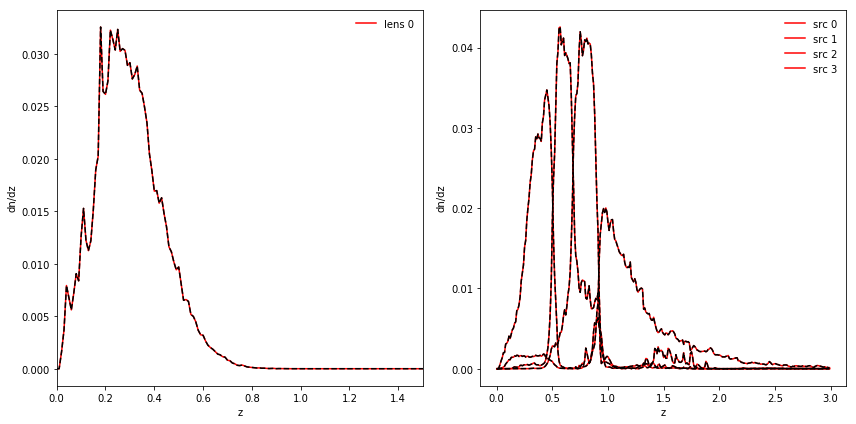

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax = axs[0]
for i in range(n_lens):
    tr = TXPipe.get_tracer('lens_%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='lens %d' % i, color='r')

for i in range(n_lens):
    ax.plot(Cosmosis['nz_lens'].data['z_mid'], Cosmosis['nz_lens'].data['bin'+str(i+1)]/np.sum(Cosmosis['nz_lens'].data['bin'+str(i+1)]), color='k', ls='--')
    #cosmosis is not normalized!

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)
ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(n_src):
    tr = TXPipe.get_tracer('source_%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i, color='r')

for i in range(n_src):
    ax.plot(Cosmosis['nz_source'].data['z_mid'], Cosmosis['nz_source'].data['bin'+str(i+1)]/np.sum(Cosmosis['nz_source'].data['bin'+str(i+1)]), color='k', ls='--')
    #cosmosis is not normalized!

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

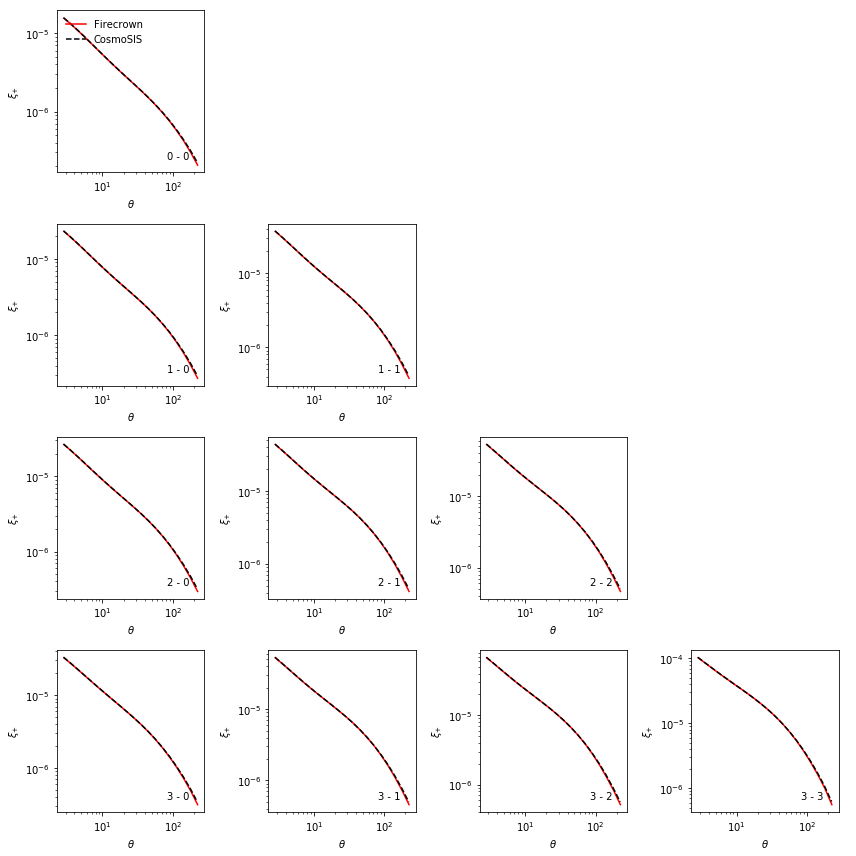

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i < j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xip = TXPipe.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'source_%d' % i, 
            'source_%d' % j)
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 #* theta
        
        # firecrown
        ax.loglog(
            theta, 
            xip, 
            label='Firecrown', color='r')
        
        # des
        xip = Cosmosis['xip'].data
        mask = (xip['bin1'] == j+1)*(xip['bin2'] == i+1)
        theta = xip['ang'][mask]
        xipp = xip['value'][mask]
        
        
        ax.loglog(
            theta, 
            xipp,
            label='CosmoSIS', color='k', ls='--')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$\xi_{+}$')
            
plt.tight_layout()

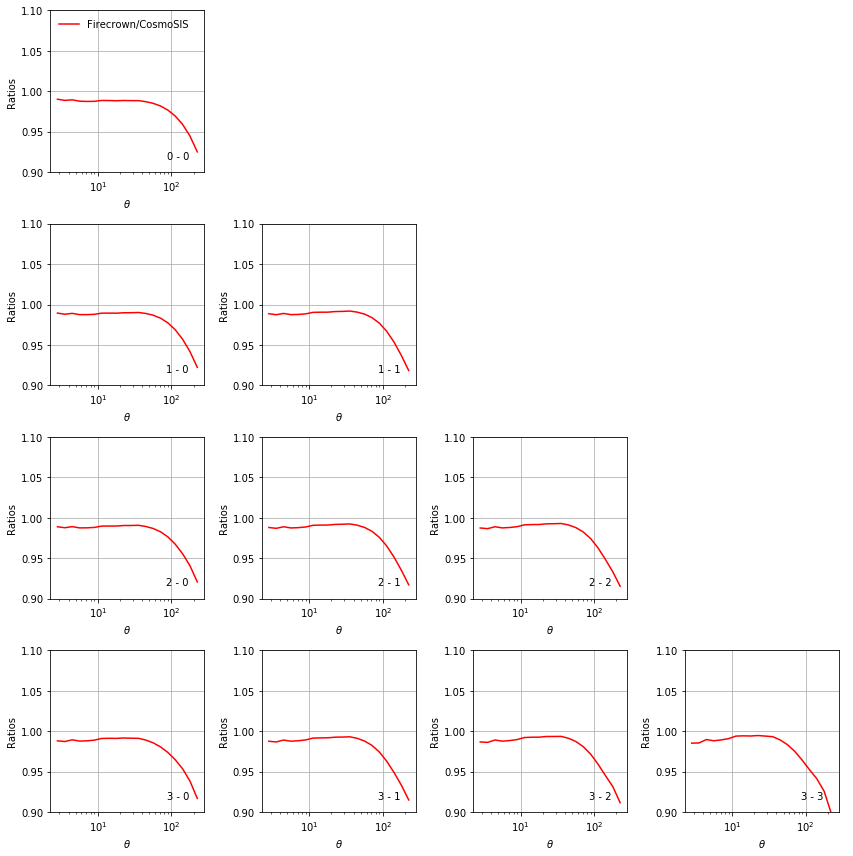

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i < j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xip = TXPipe.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'source_%d' % i, 
            'source_%d' % j)

        # des
        cosmosis = Cosmosis['xip'].data
        mask = (cosmosis['bin1'] == j+1)*(cosmosis['bin2'] == i+1)
        theta2 = cosmosis['ang'][mask]
        xip2 = cosmosis['value'][mask]

        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 #* theta
        
        # firecrown
        ax.semilogx(
            theta, 
            xip/xip2, 
            label='Firecrown/CosmoSIS', color='r')
        ax.grid()
        
                
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'Ratios')
        ax.set_ylim(0.9,1.1)
            
plt.tight_layout()
plt.savefig('xip_firecrown_cosmosis.png')

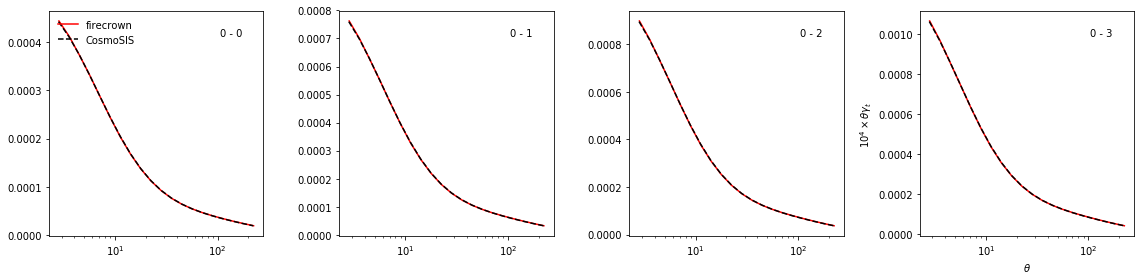

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for lensi in range(n_lens):
    for srcj in range(n_src):
        ax = axs[srcj]

        # read in the firecrown
        theta, xi = TXPipe.get_theta_xi(
            'galaxy_shearDensity_xi_t', 'source_%d' % srcj, 'lens_%d' % lensi)

        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            xi,
            label='firecrown', color='r')

        gammat = Cosmosis['gammat'].data
        mask = (gammat['bin1'] == lensi+1)*(gammat['bin2'] == srcj+1)
        theta = gammat['ang'][mask]
        gammat = gammat['value'][mask]
        
        
        ax.semilogx(
            theta, 
            gammat,
            label='CosmoSIS', color='k', ls='--')

    
        if lensi == 0 and srcj == 0:
            ax.legend(loc=2, frameon=False)

        ax.text(
            0.9, 0.9, '%d - %d' % (lensi, srcj), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta\gamma_{t}$')
            
plt.tight_layout()

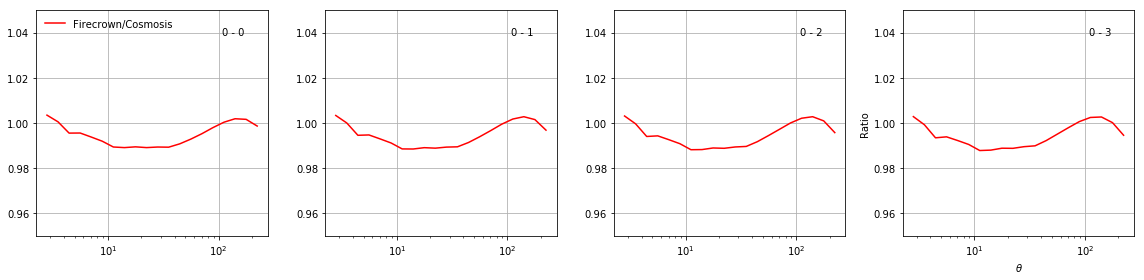

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for lensi in range(n_lens):
    for srcj in range(n_src):
        ax = axs[srcj]

        # read in the firecrown
        theta, xi = TXPipe.get_theta_xi(
            'galaxy_shearDensity_xi_t', 'source_%d' % srcj, 'lens_%d' % lensi)

        gammat = Cosmosis['gammat'].data
        mask = (gammat['bin1'] == lensi+1)*(gammat['bin2'] == srcj+1)
        theta = gammat['ang'][mask]
        gammat = gammat['value'][mask]
        
        # firecrown
        ax.semilogx(
            theta, 
            xi/gammat,
            label='Firecrown/Cosmosis', color='r')
        ax.set_ylim(0.95,1.05)
        ax.grid()

    
        if lensi == 0 and srcj == 0:
            ax.legend(loc=2, frameon=False)

        ax.text(
            0.9, 0.9, '%d - %d' % (lensi, srcj), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'Ratio')
    
            
plt.tight_layout()
plt.savefig('gammat_firecrown_cosmosis.png')

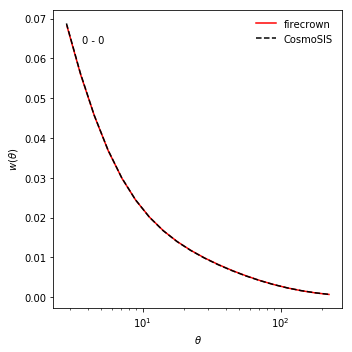

In [10]:
# get loc excluding cosmic shear and gg lensing
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for i in range(n_lens):
    ax = axs #[i]

    # read in the firecrown values
    theta, xi = TXPipe.get_theta_xi(
        'galaxy_density_xi',
        'lens_%d' % i,
        'lens_%d' % i)
                
    # firecrown
    ax.semilogx(
        theta, 
        xi,
        label='firecrown', color='r')
        
    wtheta = Cosmosis['wtheta'].data
    mask = (wtheta['bin1'] == i+1)*(wtheta['bin2'] == i+1)
    theta = wtheta['ang'][mask]
    wtheta = wtheta['value'][mask]


    ax.semilogx(
        theta, 
        wtheta,
        label='CosmoSIS', color='k', ls='--')
    
    if i == 0:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$w(\theta)$')
            
plt.tight_layout()

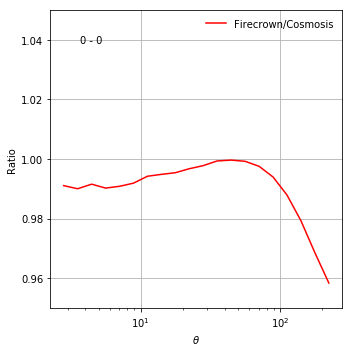

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for i in range(n_lens):
    ax = axs #[i]

    # read in the firecrown values
    theta, xi = TXPipe.get_theta_xi(
        'galaxy_density_xi',
        'lens_%d' % i,
        'lens_%d' % i)

    wtheta = Cosmosis['wtheta'].data
    mask = (wtheta['bin1'] == i+1)*(wtheta['bin2'] == i+1)
    theta = wtheta['ang'][mask]
    wtheta = wtheta['value'][mask]
    
    # firecrown
    ax.semilogx(
        theta, 
        xi/wtheta,
        label='Firecrown/Cosmosis', color='r')
    ax.set_ylim(0.95,1.05)
    ax.grid()        
    
    if i == 0:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'Ratio')
            
plt.tight_layout()
plt.savefig('wtheta_firecrown_cosmosis.png')